# 문제정의
- 붓꽃의 품종을 구분하는 머신러닝 모델을 만들어보자

# 데이터 수집
- sklearn에서 학습용 데이터로 제공

In [154]:
from sklearn.datasets import load_iris

iris =load_iris()

In [155]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [156]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [157]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [158]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# 데이터 전처리

# 탐색적 데이터 분석

## 데이터셋 구성하기
- 문제와 정답으로 구분하기

In [159]:
import pandas as pd
X=pd.DataFrame(iris['data'],columns = iris['feature_names'])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [160]:
y=iris['target']

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

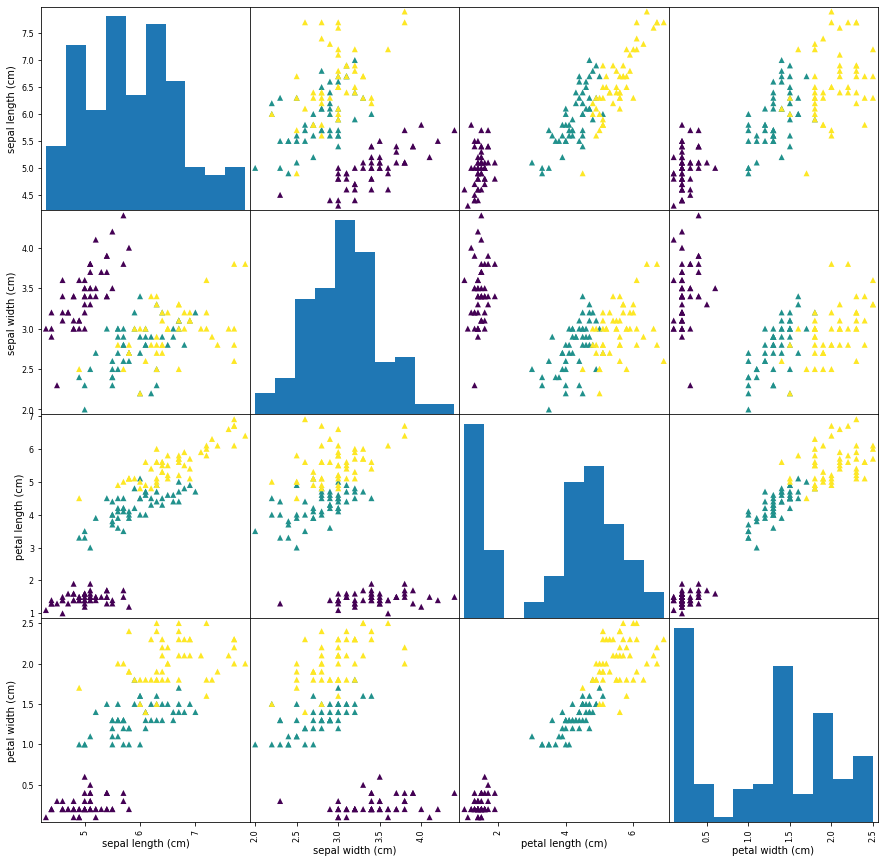

In [161]:
pd.plotting.scatter_matrix(X,
                            figsize=(15,15),
                            marker='^',
                            c=y,
                            alpha=1
)

# 모델 선택 및 하이퍼 파라미터 튜닝

## train test 분할

In [162]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [163]:
# X(문제), y(정답)을 넣으면 X_train, X_test, y_train, y_test로 만들어줌
# 데이터를 섞어줌
# train과 test의 비율을 조절
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=6)

In [164]:
X_train.shape

(105, 4)

## 모델 로드

In [165]:
from sklearn.neighbors import KNeighborsClassifier

In [166]:
knn_model=KNeighborsClassifier(n_neighbors=6)

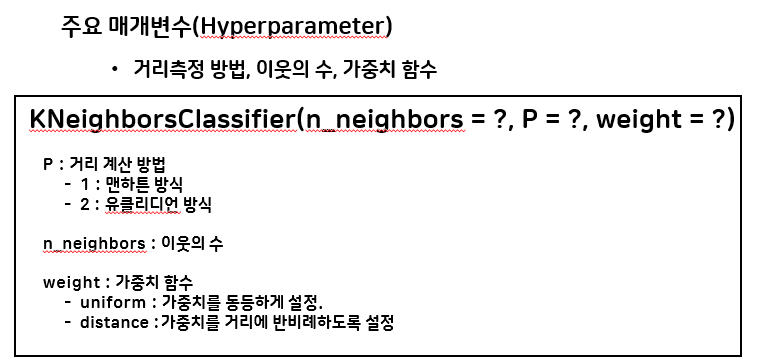

# 학습

In [167]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

# 평가

In [168]:
knn_model.score(X_train, y_train)

0.9619047619047619

In [169]:
knn_model.score(X_test,y_test)

0.9555555555555556

# 하이퍼 파라미터 튜닝
- 5, 6, 7번을 한 번에 진행
- k 값에 따라 train과 test의 score가 어떻게 변하는지 확인

In [170]:
train_score=[]
test_score=[]


n_neighbors_set=range(1,11)

for n_n in n_neighbors_set:
    knn_model=KNeighborsClassifier(n_neighbors = n_n)
    knn_model.fit(X_train, y_train)
    train_knn = knn_model.score(X_train, y_train)
    test_knn = knn_model.score(X_test, y_test)
    train_score.append(train_knn)
    test_score.append(test_knn)
    

## 그래프로 확인하기

In [171]:
import matplotlib.pyplot as plt

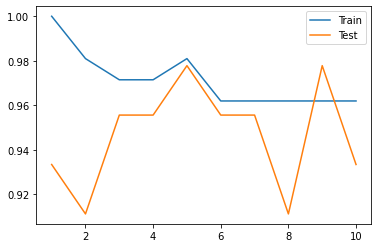

In [172]:
plt.plot(n_neighbors_set, train_score, label='Train')
plt.plot(n_neighbors_set, test_score, label='Test')
plt.legend()
plt.show()

# GridSearch
- 하이퍼 파라미터 튜닝을 쉽게 해주는 도구
- 하이퍼 파라미터의 범위를 지정해 놓으면 학습을 전부 진행하고
- 가장 좋은 값을 출력

In [173]:
from sklearn.model_selection import GridSearchCV

In [174]:
param_grid = {
    'n_neighbors' : range(1,20),
    'p' : [1,2],
    'weights' : ['uniform', 'distance']
}

In [175]:
grid= GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [176]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [177]:
grid.best_score_

0.9714285714285715

In [178]:
grid.best_params_

{'n_neighbors': 14, 'p': 1, 'weights': 'uniform'}

In [181]:
knn_model=KNeighborsClassifier(n_neighbors=14, p=1, weights='uniform')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14, p=1)